# HDS 5210 Final Project:
                  

   ## ANALYSIS OF STROKE IN PATIENTS GLOBALLY

### RUPAMI MANDALI

The World Health Organization (WHO) and the Heart Disease Predictions with Shapley are the two data sources used in this study to analyze data on strokes globally. Although the World Health Organization is constantly operated, the Heart Disease Predictions with Shapley is one of the prediction data where the data is calculated by the Shapley values. The current effort thus focuses on the global causes of stroke

### Below are the links for the datasets:

World Health Organization:

Source:https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset


Heart Disease Predictions with Shapley:

Source:https://www.kaggle.com/code/kellibelcher/heart-disease-predictions-with-shapley/notebook#2-|-Data-Overview


### OBJECTIVES OF THE DATASETS:

According to the World Health Organization (WHO), stroke is the second most major cause of death worldwide, accounting for around 11% of all fatalities.
Based on input characteristics including gender, age, numerous illnesses, and smoking status, this dataset is used to determine whether a patient is likely to get a stroke. Each row of the data contains pertinent patient information.

Shapley values were utilized to create a Gradient Boosting model that can predict the likelihood of a heart disease diagnosis with an Area Under the Curve of 0.927 in the detection of cardiovascular disease. We also discovered important cardiac disease signs and their impact on foretelling a favorable diagnosis using Shapley values. The interaction effects between a patient's medical data, particularly in characteristics that included a patient's age, cholesterol, blood pressure, ST Slope, and kind of chest pain, were among of the model's most crucial predictions. Gradient Boosting, the top-performing model, had an overall F1-Score of 90% and an accuracy of 89%, making it useful for the early identification and diagnosis of heart disease.

Trans between two related data sources is frequently necessary since no individual dataset has all the information that is considered necessary. Empirical investigation, database administration, and corroboration will be the main focuses of the present project. In order to assess if WHO collects data that is equivalent to Heart Disease Predictions with Shapley, a longitudinal in-person survey, I will also analyze data from both sources. I will choose variables from the present project that can be compared and harmonized across the two data sources.

This comparision between the two data sets helps for the future cause World Health Organization is the continous form of data collection. The Shapley values are mainly introduced only for the analysis of the cardiovascular diseases focuses on the heart strokes. 

### VARIABLES CONSIDERED ARE:

Below are the set of variables collected from both the data sets-

* ID
* AGE
* SEX
* CHEST PAIN TYPE
* HYPERTENSION
* HEART_DISEASE
* RESTING BP
* EXERCISE ANGINA
* WORK_TYPE
* RESIDENCE_TYPE
* MARRIAGE
* GLOCOSE_LEVEL

### CREATING DATASET-

In [1]:
# import pandas
import pandas as pd

In [2]:
# reading csv file
data = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
# reading other csv file
data = pd.read_csv('heart.csv')

In [4]:
# Create a function to subset columns given a list of variables
def column_select (dataframe, l):
    '''list, dataframe, and dataframe
A dataframe and a list are the two parameters this function accepts. Only columns matching the input are included in the dataframe that is returned.

of the supplied list. 
    '''
    smalldata = dataframe[l]
    return smalldata   

In [5]:
# collecting the variables of interest from file heart disease predictions with shapley
heartdata = column_select(data, ['Age','Sex',
                              'ChestPainType','RestingBP',
                              'Cholesterol','FastingBS',
                              'RestingECG','MaxHR',
                              'ExerciseAngina','Oldpeak',
                              'ST_Slope','HeartDisease' ])
                     


In [6]:
heartdata.head

<bound method NDFrame.head of      Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease

In [7]:
# Create a function to subset columns given a list of variables
def column_select (dataframe, l):
    '''list, dataframe, and dataframe
A dataframe and a list are the two parameters this function accepts. Only columns matching the input are included in the dataframe that is returned.

of the supplied list. 
    '''
    smalldata = dataframe[l]
    return smalldata   

In [8]:
# reading csv file
data = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [9]:
 #collecting the variables of interest from file healthcare dataset stroke data
healthcaredata = column_select(data,['id','gender',
                                      'age','hypertension',
                                      'heart_disease','ever_married',
                                      'work_type','Residence_type',
                                      'avg_glucose_level','bmi',
                                      'smoking_status','stroke'])
    
  

In [10]:
healthcaredata.head

<bound method NDFrame.head of          id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban   

In [11]:
healthcaredata.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

Basically the two datasets of World Health Organization and Heart Disease predictions with Shapley contain the common column called age,sex and other similar columns so I want to compare the two data sets according to the gender  where which data set shows perfect analysis of heart disease

In [12]:
# Create variables in Heart Disease predictions with Shapley data for RestingBP and Cholesterol fracture to harmonize with World Health Organization
# View the unique values
heartdata['RestingBP'].value_counts()

120    132
130    118
140    107
110     58
150     55
      ... 
113      1
164      1
117      1
127      1
0        1
Name: RestingBP, Length: 67, dtype: int64

In [13]:
heartdata['Cholesterol'].value_counts()

0      172
254     11
223     10
220     10
230      9
      ... 
355      1
354      1
353      1
349      1
603      1
Name: Cholesterol, Length: 222, dtype: int64

In [14]:
heartdata['RestingBP']

0      140
1      160
2      130
3      138
4      150
      ... 
913    110
914    144
915    130
916    130
917    138
Name: RestingBP, Length: 918, dtype: int64

In [15]:
heartdata['Cholesterol']

0      289
1      180
2      283
3      214
4      195
      ... 
913    264
914    193
915    131
916    236
917    175
Name: Cholesterol, Length: 918, dtype: int64

### Data Recoding With Classification model

Based on a cross-examination of the available codebooks, variables were harmonized. Using the provided codebooks, variables were modified and values were compiled to improve readability.

In [16]:
# View the columns for Heart disease prediction with shapley's data
heartdata.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [17]:
# Rename variables in Heartdisease prediction with shapley's data to match the common definitions
heartdata = heartdata.rename(columns={'Sex': 'Gender','ChestPainType': 'ChestPain','RestingBP':'BP',
                                     'FastingBS':'BloodSugarLevel','RestingECG':'ECG','MaxHR': 'HeartRate',
                                     'ExerciseAngina': 'Angina','HeartDisease': 'Stroke'})

In [18]:
# Recode the ECG variable
heartdata['ECG'] = heartdata['ECG'].map({'Normal': 'Excellent',
                                    'ST': 'Fair',
                                    'LVH': 'Average'})

In [19]:
heartdata['ECG'].value_counts()

Excellent    552
Average      188
Fair         178
Name: ECG, dtype: int64

In [101]:
# Recode the ChestPain variable
heartdata.loc[heartdata['ChestPain'] == 'ATA', 'ChestPain'] = 'controllable',
heartdata.loc[heartdata['ChestPain'] == 'NAP', 'ChestPain'] = 'can be controllable',
heartdata.loc[heartdata['ChestPain'] == 'ASY', 'ChestPain'] = 'controlled',
heartdata.loc[heartdata['ChestPain'] == 'TA', 'ChestPain'] = 'uncontrolled'.


SyntaxError: invalid syntax (<ipython-input-101-efcbc3731aeb>, line 5)

In [21]:
heartdata['ChestPain'].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPain, dtype: int64

In [22]:
# Recode the BloodSugarLevel variables
heartdata['BloodSugarLevel'] = heartdata['BloodSugarLevel'].map({'0': 'dead',
                                       '1': 'Increased' })


In [23]:
heartdata['BloodSugarLevel'].value_counts()

Series([], Name: BloodSugarLevel, dtype: int64)

In [24]:
# Recode the HeartRate variables
heartdata['HeartRate'] = heartdata['HeartRate'].map({'98': 'Normal',
                                       '108': 'Increased',
                                       '115': 'Increased',
                                       '122': 'faster beat',
                                       '132': 'faster beat',
                                       '141': 'more faster beats',
                                       '156': 'max beats',
                                       '172': 'max beats',
                                       '173': 'max beats',
                                       '174': 'risk'})

In [25]:
heartdata['HeartRate'].value_counts()

Series([], Name: HeartRate, dtype: int64)

In [26]:
# Recode the Angina variables
heartdata['Angina'] = heartdata['Angina'].map({'N': 'No',
                                       'Y': 'Yes'})

In [27]:
heartdata['Angina'].value_counts()

No     547
Yes    371
Name: Angina, dtype: int64

In [ ]:
# Recode the Stroke variables
heartdata['Stroke'] = heartdata['Stroke'].map ({'0': 'No',
                                       '1': 'Yes'})

In [29]:
heartdata['Stroke'].value_counts()

Series([], Name: Stroke, dtype: int64)

In [30]:
# Recode the Gender variables
heartdata['Gender']= heartdata['Gender'].map({'M':'Male',
                                             'F': 'Female'})

In [31]:
heartdata['Gender'].value_counts()

Male      725
Female    193
Name: Gender, dtype: int64

### Recoding the Healthcare dataset stroke data

In [32]:
# View the columns for Healthcare dataset stroke data
healthcaredata.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [33]:
# Rename variables in Healthcare dataset stroke data to match the common definitions
healthcaredata = healthcaredata.rename(columns={'ever_married':'Marital_status','work_type':'Employment',
                                                'Residence_type':'Locality','avg_glucose_level':'BloodSugarLevel',
                                                'smoking_status':'Smoke_check','hypertension':'Angina'})

In [34]:
#Recode the Marital_status variables
healthcaredata['Marital_status']=healthcaredata['Marital_status'].map({'Yes':'Married',
                                                                      'No':'Unmarried'})

In [35]:
healthcaredata['Marital_status'].value_counts()

Married      3353
Unmarried    1757
Name: Marital_status, dtype: int64

In [36]:
#Recode the Employment variables
healthcaredata['Employment']=healthcaredata['Employment'].map({'Private':'Priv',
                                                              'Self-employed': 'Own_business',
                                                               'Govt_job': 'Govt'
                                                              })

In [37]:
healthcaredata['Employment'].value_counts()

Priv            2925
Own_business     819
Govt             657
Name: Employment, dtype: int64

In [38]:
#Recode the Locality variables
healthcaredata['Locality']=healthcaredata['Locality'].map({'Urban':'Town',
                                                          'Rural':'Countryside'})

In [39]:
healthcaredata['Locality'].value_counts()

Town           2596
Countryside    2514
Name: Locality, dtype: int64

In [40]:
#Recode the BloodSugarLevel variables
healthcaredata['BloodSugarLevel']=healthcaredata['BloodSugarLevel'].map({'82.99':'Normal',
                                                                        '83.75':'Normal',
                                                                        '85.28':'Normal',
                                                                        '105.92':'Normal',
                                                                        '125.20':'Normal',
                                                                        '166.29':'Moderate',
                                                                        '171.23':'Quite a bit',
                                                                        '174.12':'Max',
                                                                        '202.21':'Max',
                                                                        '228.69':'Extreme'})

In [41]:
healthcaredata['BloodSugarLevel'].value_counts()

Series([], Name: BloodSugarLevel, dtype: int64)

In [42]:
#Recode the Smoke_check variables
healthcaredata['Smoke_check']=healthcaredata['Smoke_check'].map({'formerly smoked':'Earlier',
                                                                'never smoked': 'Nonsmoker',
                                                                'smoker':'smoker',
                                                                 'unknown':'not known'})

In [43]:
healthcaredata['Smoke_check'].value_counts()

Nonsmoker    1892
Earlier       885
Name: Smoke_check, dtype: int64

In [44]:
#Recode the Angina variables
healthcaredata['Angina']=healthcaredata['Angina'].map({'0':'No',
                                                      '1':'Yes'})

In [45]:
healthcaredata['Angina'].value_counts()

Series([], Name: Angina, dtype: int64)

In [46]:
# Inductive content the Healthcare and Heart datasets, resetting the index and utilizing the source identification as a key.
compositeData = pd.concat([heartdata, healthcaredata], axis = 0, keys = ['heart', 'healthcaredata'],
                          names = ['source']).reset_index(level = 'source')

In [47]:
# Check the composite data set
compositeData

,source,Age,Gender,ChestPain,BP,Cholesterol,BloodSugarLevel,ECG,HeartRate,Angina,...,id,gender,age,heart_disease,Marital_status,Employment,Locality,bmi,Smoke_check,stroke
0,heart,40.0,Male,ATA,140.0,289.0,NaN,Excellent,NaN,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,heart,49.0,Female,NAP,160.0,180.0,NaN,Excellent,NaN,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,heart,37.0,Male,ATA,130.0,283.0,NaN,Fair,NaN,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,heart,48.0,Female,ASY,138.0,214.0,NaN,Excellent,NaN,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,heart,54.0,Male,NAP,150.0,195.0,NaN,Excellent,NaN,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,healthcaredata,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,18234.0,Female,80.0,0.0,Married,Priv,Town,NaN,Nonsmoker,0.0
5106,healthcaredata,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,44873.0,Female,81.0,0.0,Married,Own_business,Town,40.0,Nonsmoker,0.0
5107,healthcaredata,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,19723.0,Female,35.0,0.0,Married,Own_business,Countryside,30.6,Nonsmoker,0.0
5108,healthcaredata,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,37544.0,Male,51.0,0.0,Married,Priv,Countryside,25.6,Earlier,0.0


In [48]:
# Ensure age is numeric
compositeData['Age'] = compositeData['Age'].astype(float)

In [49]:
compositeData.dtypes

source              object
Age                float64
Gender              object
ChestPain           object
BP                 float64
Cholesterol        float64
BloodSugarLevel     object
ECG                 object
HeartRate           object
Angina              object
Oldpeak            float64
ST_Slope            object
Stroke              object
id                 float64
gender              object
age                float64
heart_disease      float64
Marital_status      object
Employment          object
Locality            object
bmi                float64
Smoke_check         object
stroke             float64
dtype: object

## Summary of Data Cleaning

The compositeData is only able to compare the two genders in two different data sets. In addition to the variables previously mentioned, it also includes a variable for the data source (heart vs. healthcare). Since it was difficult to synchronize the data for resting blood pressure and cholesterol, no analysis will be carried out for this project. The proper recoding of other variables has been done.

## Analysing the Data

* Employment
* Angina
* Stroke
* BloodPressure
* HeartRate

To make it easier to compare the distributions, all cross-tabulated data is standardized by data source. These merge will be kept in a dictionary with the key representing the relevant variable and the value representing the merge data frame.

In [50]:
# import pandas
import pandas as pd

In [53]:
import numpy as np


In [57]:
# Examine the mean age by source (HealthCare vs Heart) and BloodSugarLevel
agePivot = pd.pivot_table(data = compositeData, values = 'Age', columns = ['source', 'Employment'], 
                             aggfunc = np.mean)

In [58]:
agePivot

Age


In [76]:
# Make a list of the interesting factors to study.
variablesList = ['ChestPain','Age', 'BloodSugarLevel','gender', 'Angina', 'Stroke', 'Locality', 'Employment', 'Marital_status','Gender']

#Make a blank dictionary for the merge tables.
CrossTablesDict = {}

In [77]:
# Make crosstabulated tables, then add them to a list of tables.
for variable in variablesList:
    # Give the table a name based on the variable's name
     tableName = '{}Cross'.format(variable) 
     # Construct cross tabulations to analyse data by source for specific variables and to aggregate it for analysis.
     table = pd.crosstab(compositeData[variable], compositeData['source'], normalize = 'columns')
     CrossTablesDict[tableName] = table

In [78]:
# Verify the creation in the dictionary.
CrossTablesDict

{'ChestPainCross': source        heart
 ChestPain          
 ASY        0.540305
 ATA        0.188453
 NAP        0.221133
 TA         0.050109, 'AgeCross': source     heart
 Age             
 28.0    0.001089
 29.0    0.003268
 30.0    0.001089
 31.0    0.002179
 32.0    0.005447
 33.0    0.002179
 34.0    0.007625
 35.0    0.011983
 36.0    0.006536
 37.0    0.011983
 38.0    0.017429
 39.0    0.016340
 40.0    0.014161
 41.0    0.026144
 42.0    0.019608
 43.0    0.026144
 44.0    0.020697
 45.0    0.019608
 46.0    0.026144
 47.0    0.020697
 48.0    0.033769
 49.0    0.022876
 50.0    0.027233
 51.0    0.038126
 52.0    0.039216
 53.0    0.035948
 54.0    0.055556
 55.0    0.044662
 56.0    0.041394
 57.0    0.041394
 58.0    0.045752
 59.0    0.038126
 60.0    0.034858
 61.0    0.033769
 62.0    0.038126
 63.0    0.032680
 64.0    0.023965
 65.0    0.022876
 66.0    0.014161
 67.0    0.016340
 68.0    0.010893
 69.0    0.014161
 70.0    0.007625
 71.0    0.005447
 72.0    0.00435

In [79]:
# Before plotting, properly print the findings for analysis.
for key in CrossTablesDict:
    print(key)
    print(CrossTablesDict[key])
    print()

ChestPainCross
source        heart
ChestPain          
ASY        0.540305
ATA        0.188453
NAP        0.221133
TA         0.050109

AgeCross
source     heart
Age             
28.0    0.001089
29.0    0.003268
30.0    0.001089
31.0    0.002179
32.0    0.005447
33.0    0.002179
34.0    0.007625
35.0    0.011983
36.0    0.006536
37.0    0.011983
38.0    0.017429
39.0    0.016340
40.0    0.014161
41.0    0.026144
42.0    0.019608
43.0    0.026144
44.0    0.020697
45.0    0.019608
46.0    0.026144
47.0    0.020697
48.0    0.033769
49.0    0.022876
50.0    0.027233
51.0    0.038126
52.0    0.039216
53.0    0.035948
54.0    0.055556
55.0    0.044662
56.0    0.041394
57.0    0.041394
58.0    0.045752
59.0    0.038126
60.0    0.034858
61.0    0.033769
62.0    0.038126
63.0    0.032680
64.0    0.023965
65.0    0.022876
66.0    0.014161
67.0    0.016340
68.0    0.010893
69.0    0.014161
70.0    0.007625
71.0    0.005447
72.0    0.004357
73.0    0.001089
74.0    0.007625
75.0    0.003268
76.0 

## Data Analysis Summary

According to the Healthcare dataset, women are more likely than men to get a stroke. In contrast, the Heart dataset shows that men are more likely than women to get heart disease. The groups' ages, however, are all comparable.

Data was compiled into cross tabulations for the aforementioned factors. Most of the distributions seem to vary, which may be seen more clearly by graphing.

##  Discussion

We'll plot the above-created aggregated data to allow for detailed evaluation.

Below Graph is plotted against the Cholesterol and the Age factors so as to examine the amount to cholesterol affects the body according to the Age to highly respond to the heart diseases.

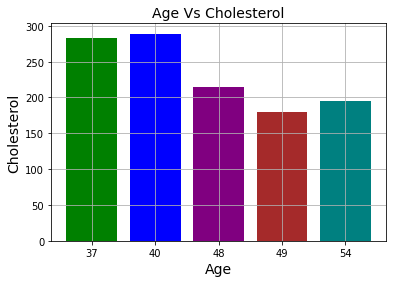

In [93]:
# Plot the mean age by source and Cholesterol
import matplotlib.pyplot as plt
import pandas as pd
   
data = {'Age': ['37', '40', '48', '49', '54'],
        'Cholesterol': [283.0,289.0,214.0,180.0,195.0]
       }
df = pd.DataFrame(data)

colors = ['green','blue','purple','brown','teal']
plt.bar(df['Age'], df['Cholesterol'], color=colors)
plt.title('Age Vs Cholesterol', fontsize=14)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Cholesterol', fontsize=14)
plt.grid(True)
plt.show()

## Project Summary

Variations between the HealthCare dataset and the Heart data are illustrated in representations of the merge data. This is to be expected given the various model for analyzing and analytical approaches. Here are some observations about each component.

#### AGE

Between the two data sets, the mean age appears to be identical. To ascertain similarity, it would be necessary to look at the prevalence, range, and sample variance. However, as the range of ages for all the data is 37–54, the same mean is anticipated.

#### BloodSugarLevel

Compared to Heart Disease Prediction with Shapley participants, more HealthCare data participants report a BloodSugarLevel diagnosis. This may be somewhat attributable to the comparison of the patients between urban and rural locations, which is mostly focused on localities. Due to the possibility that some of the individuals without a new diagnosis of Heart disease may have reported a diagnosis in prior years, combining all the years of data would be necessary for a more accurate comparison.

#### Angina

The overall health distribution is quite uniform. While more people who participate in Heart Disease Prediction with Shapley report better health, more people who participate in HealthCare data tend to report worse health. The Patients in the HealthCare data are chosen based on the age categories as well as the participants' smoking status. Due to the smoking status the participants in the HealthCare Dataset tend to have high risk of stroke.

#### Stroke

According to the two data sets choosen, higher rate of stroke is examined in the HealthCare Dataset where as, the Heart Disease Prediction with Shapley doesn't show higher rate of stroke among the participants. The participants choosen in the HealthCare Dataset where females are more effected to the heart diseases rather than the Heart Disease Prediction with Shapley. The participants choosen in the Heart Disease Prediction with Shapley where males are more effected to heart diseases rather than the HealthCare Dataset.

#### Cholesterol

Participants in the Heart Disease Prediction with Shapley are tested to heart diseases along with the cholesterol so the participants in the Heart Disease Prediction with Shapley dataset are examined by the fluctuations in the cholesterol levels in the body.

### My Findings

From the above calculations I have examined that the Participants at the younger age has a more risk of having the heart disease and also which leads to the stroke. More over the Males the highly in danger to have strokes compared to the Females.

As the World Health Organization is a continous process of anylasing the diseases and disorders from this study I came to know that it is representing that the Females are slightly more effected than the males to the heart diseases. The Heart Disease Prediction with Shapley has a high rate of male effect prediction to heart diseases than the Females. 

After the examination of the World Health Organization dataset the smoking_status of the participants based on the locaties the Urban participants have more risk of the stroke as they are more involved in the smoking compared to the rural people.

## Reference

This dataset was created by combining different datasets already available independently but not combined before. In this dataset, 5 heart datasets are combined over 11 common features which makes it the largest heart disease dataset available so far for research purposes. The five datasets used for its curation are:

Cleveland: 303 observations
Hungarian: 294 observations
Switzerland: 123 observations
Long Beach VA: 200 observations
Stalog (Heart) Data Set: 270 observations
Total: 1190 observations
Duplicated: 272 observations

Final dataset: 918 observations

Every dataset used can be found under the Index of heart disease datasets from UCI Machine Learning Repository on the following link: https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/

Citation
fedesoriano. (September 2021). Heart Failure Prediction Dataset. Retrieved [Date Retrieved] from https://www.kaggle.com/fedesoriano/heart-failure-prediction.

Stroke Prediction Dataset taken from the World Health Organization(WHO) where the source and reference is confidential so the Author mentioned is Mr. FEDESORIANO

I have extracted the dataset from the below link:
Source:https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset


#### Github Submission
Code adapated from homework assignments.

In [98]:
a=input('''
Are you ready to submit your work?
1. Click the Save icon (or do Ctrl-S / Cmd-S)
2. Type "yes" or "no" below
3. Press Enter

''')

if a=='yes':
    !git pull
    !git add Final_DeMarco.ipynb
    !git commit -a -m "Submitting final project programming assignment"
    !git push
else:
    print('''
    
OK. We can wait.
''')


Are you ready to submit your work?
1. Click the Save icon (or do Ctrl-S / Cmd-S)
2. Type "yes" or "no" below
3. Press Enter

 yes


Already up to date.
fatal: pathspec 'Final_DeMarco.ipynb' did not match any files
On branch main
Your branch is up to date with 'origin/main'.

Untracked files:
	../National_Health_Interview_Survey__NHIS__-_National_Cardiovascular_Disease_Surveillance_Data.csv
	../Untitled1.ipynb
	../Week06/week06.ipynb
	./
	../healthcare-dataset-stroke-data.csv
	../heart.csv
	../midterm.ipynb/untitled.txt
	../week02/week02_in class.ipynb
	../week03 in_class.ipynb
	../week04/week04 in_class.ipynb
	../week09/City-of-St-Louis-COVID-19-Case-Data.csv
	../week09/indian_liver_patient.csv
	../week11_earn_back.ipynb
	../week13/mental-heath-in-tech-2016_20161114.csv.zip
	../week13/monkeypox.csv
	../week14/HospitalCosts_Kaggle.csv
	../week14/cms2014.csv
	../week14/cms2015.csv
	../week14/cms2016.csv
	../week14/npidata.csv
	../week14/untitled.txt

nothing added to commit but untracked files present
Everything up-to-date
